In [58]:
import numpy as np
import pandas as pd

In [59]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
movies = pd.read_csv('u.data', sep='\t', names=column_names)

In [60]:
movies.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [61]:
movies.describe()['rating']

count    100003.000000
mean          3.529864
std           1.125704
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [62]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
user_id      100003 non-null int64
item_id      100003 non-null int64
rating       100003 non-null int64
timestamp    100003 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [63]:
titles = pd.read_csv('Movie_Id_Titles')

In [64]:
titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [65]:
frame = movies.merge(titles,on='item_id')

In [66]:
frame.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [68]:
frame.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [69]:
frame.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [70]:
ratings = pd.DataFrame(frame.groupby('title')['rating'].mean())

In [71]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [72]:
ratings['rating_count'] = pd.DataFrame(frame.groupby('title')['rating'].count())

In [73]:
ratings.head()

,rating,rating_count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


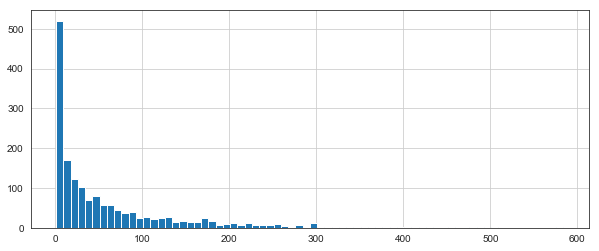

In [74]:
plt.figure(figsize=(10,4))
ratings['rating_count'].hist(bins=70)

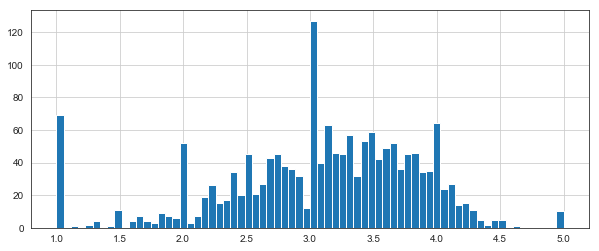

In [75]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

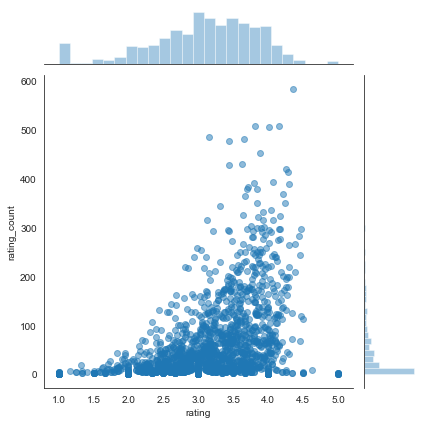

In [76]:
sns.jointplot(x='rating',y='rating_count',data=ratings,alpha=0.5)

In [77]:
movie_mat = frame.pivot_table(index='user_id', columns='title', values='rating')

In [78]:
movie_mat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
ratings.head(20)

,rating,rating_count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93
"20,000 Leagues Under the Sea (1954)",3.500000,72
2001: A Space Odyssey (1968),3.969112,259
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5


In [80]:
# Ace Ventura: Pet Detective (1994)
movie_name = 'Ace Ventura: Pet Detective (1994)'
movie_ratings = movie_mat[movie_name]
movie_ratings.head()

user_id
0    NaN
1    3.0
2    NaN
3    NaN
4    NaN
Name: Ace Ventura: Pet Detective (1994), dtype: float64

In [107]:
similar_movies = movie_mat.corrwith(movie_ratings)

In [106]:
recos = pd.DataFrame(similar_movies, columns=['corr'])

In [111]:
recos[recos.isnull() == True]

,corr
title,
'Til There Was You (1997),NaN
1-900 (1994),NaN
101 Dalmatians (1996),NaN
12 Angry Men (1957),NaN
187 (1997),NaN
2 Days in the Valley (1996),NaN
"20,000 Leagues Under the Sea (1954)",NaN
2001: A Space Odyssey (1968),NaN
3 Ninjas: High Noon At Mega Mountain (1998),NaN


In [98]:
recos.sort_values(by='corr', ascending=False).head()

,corr,rating_count
title,,
Ace Ventura: Pet Detective (1994),1.000000,103
"Edge, The (1997)",0.723123,113
Scream 2 (1997),0.573282,106
Shine (1996),0.566248,129
"Nightmare on Elm Street, A (1984)",0.509132,111


In [113]:
recos[recos.isnull()['corr'] == True]

,corr
title,
3 Ninjas: High Noon At Mega Mountain (1998),NaN
8 Heads in a Duffel Bag (1997),NaN
8 Seconds (1994),NaN
A Chef in Love (1996),NaN
Afterglow (1997),NaN
Aiqing wansui (1994),NaN
Alaska (1996),NaN
Albino Alligator (1996),NaN
All Over Me (1997),NaN


In [84]:
recos.head()

,corr
title,
'Til There Was You (1997),0.981981
1-900 (1994),-1.000000
101 Dalmatians (1996),-0.147491
12 Angry Men (1957),-0.243775
187 (1997),-0.688247


In [114]:
recos = recos.join(ratings['rating_count'])
recos.head()

,corr,rating_count
title,,
'Til There Was You (1997),0.981981,9
1-900 (1994),-1.000000,5
101 Dalmatians (1996),-0.147491,109
12 Angry Men (1957),-0.243775,125
187 (1997),-0.688247,41


In [115]:
recos[recos['corr'].isnull() == True]

,corr,rating_count
title,,
3 Ninjas: High Noon At Mega Mountain (1998),NaN,5
8 Heads in a Duffel Bag (1997),NaN,4
8 Seconds (1994),NaN,4
A Chef in Love (1996),NaN,8
Afterglow (1997),NaN,18
Aiqing wansui (1994),NaN,1
Alaska (1996),NaN,13
Albino Alligator (1996),NaN,6
All Over Me (1997),NaN,3


In [89]:
recos = recos[recos['rating_count']>100]

In [93]:
recos.dropna(inplace=True)

In [95]:
recos.sort_values(by='corr', ascending=False).head()

,corr,rating_count
title,,
Ace Ventura: Pet Detective (1994),1.000000,103
"Edge, The (1997)",0.723123,113
Scream 2 (1997),0.573282,106
Shine (1996),0.566248,129
"Nightmare on Elm Street, A (1984)",0.509132,111
